In [ ]:
!pip install praat-parselmouth
!pip install --upgrade librosa
!pip install librosa scipy
!pip install datasets
!pip install pysptk
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 99.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 461.9/461.9 kB 31.6 MB/s eta 0:00:0

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, Bidirectional, Embedding, GlobalAveragePooling2D, Attention
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# PyTorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset
from transformers import RobertaModel, RobertaTokenizer

# Sklearn
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score as sklearn_f1_score

# SciPy
from scipy.signal import lfilter
from scipy.io import wavfile

# Google Colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Load File

In [ ]:
data_10_tokens = pd.read_csv('/content/drive/Shared drives/CS298/CS 297/IEMOCAP/IEMOCAP_MAJOR_10_TOKENS.csv')

In [ ]:
data = pd.read_csv('/content/drive/Shared drives/CS298/CS 297/IEMOCAP/IEMOCAP_MAJOR_LABELLED.csv')

In [ ]:
audio_features = pd.read_csv('/content/drive/Shared drives/CS298/CS 297/Code/Audio Models/audio_features_with_major_emotion_all_tokens.csv')

In [ ]:
data.head()

,Session,Conversation,Audio_Path,Speaker_id,Transcript,Time_Frame,Audio_Uttrance_Path,category,most_repeated_label
0,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M001,I wonder.,008.6300-009.6700,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Fear', 'Excited']",fear
1,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M002,It must be them then.,011.4300-012.7900,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Fear', 'Excited']",fear
2,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F005,Ahh. It sent shivers up my spine.,025.9111-030.4663,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Frustration', 'Excited', 'Excited']",excited
3,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M006,What shall we do if they suddenly walk in on us?,029.8095-033.1781,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Frustration', 'Excited', 'Excited']",excited
4,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F006,Behave exquisitely.,032.8800-034.9200,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Excited', 'Happiness', 'Excited']",excited


In [ ]:
data_10_tokens.head()

,Session,Conversation,Audio_Path,Speaker_id,Transcript,Time_Frame,Audio_Uttrance_Path,category,most_repeated_label
0,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M006,What shall we do if they suddenly walk in on us?,029.8095-033.1781,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Frustration', 'Excited', 'Excited']",excited
1,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M008,Things that ought to matter dreadfully don't m...,036.8900-040.9600,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Excited', 'Happiness', 'Excited']",excited
2,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F009,It's true the whole business is very poor joke.,044.5300-047.2100,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Excited', 'Excited', 'Excited']",excited
3,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F011,Don't laugh at me. I'm serious.,058.0200-060.9100,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Excited', 'Happiness', 'Excited']",excited
4,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F014,"Oh, how long will it last, this ludicrous, ove...",080.9600-086.2504,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Excited', 'Happiness', 'Excited']",excited


In [ ]:
len(data_10_tokens)

4524

In [ ]:
audio_features.head()

,MFCC_0,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,...,LPC_3,LPC_4,LPC_5,LPC_6,LPC_7,LPC_8,LPC_9,LPC_10,Emotion,Speaker_id
0,-307.39905,139.353800,-55.655650,35.709640,-24.282598,-8.041896,-15.103068,-7.157278,-6.234849,4.638667,...,-4.981248,4.880449,-4.198057,3.281164,-2.435601,1.757024,-1.040697,0.348874,fear,Ses04F_script03_1_M001
1,-381.90390,112.582700,-28.641914,41.377426,-14.992129,13.524291,-15.060655,0.119447,-9.428417,12.295828,...,-3.461308,3.362551,-3.217988,2.886278,-2.236722,1.461330,-0.787530,0.277015,fear,Ses04F_script03_1_M002
2,-352.65040,68.832466,-20.212467,16.935734,-22.049332,8.931537,-15.522003,-6.032151,-2.046423,5.841474,...,-3.112117,3.180664,-2.962393,2.690530,-2.234719,1.561520,-0.864859,0.355253,excited,Ses04F_script03_1_F005
3,-421.58060,112.043160,-17.711933,36.504970,-16.693699,13.678688,-12.622216,6.954140,-11.975270,12.579329,...,-2.220973,2.340549,-2.228829,1.871353,-1.385259,1.110445,-0.731721,0.259866,excited,Ses04F_script03_1_M006
4,-375.73663,87.983460,-6.579818,40.463880,-16.663490,-0.006741,-16.591389,5.656933,-15.612326,1.732163,...,-2.902323,2.735996,-2.665594,2.337090,-1.815214,1.168272,-0.410207,0.110669,excited,Ses04F_script03_1_F006


In [ ]:
import pandas as pd


# Extract the unique Speaker_id values from data_10_tokens
valid_speaker_ids = set(data_10_tokens['Speaker_id'])

# Filter data and audio_features based on Speaker_id
data = data[data['Speaker_id'].isin(valid_speaker_ids)]
audio_features = audio_features[audio_features['Speaker_id'].isin(valid_speaker_ids)]

# Display the results
print(f"Filtered data length: {len(data)}")
print(f"Filtered audio_features length: {len(audio_features)}")


Filtered data length: 4524
Filtered audio_features length: 4524


In [ ]:
len(audio_features)

4524

In [ ]:
emotion_counts = data['most_repeated_label'].str.strip().str.lower().value_counts()

# Print unique values along with their counts
for emotion, count in emotion_counts.items():
    print(f"{emotion}: {count}")

frustration: 1325
neutral: 877
excited: 735
anger: 648
sadness: 575
happiness: 311
surprise: 28
fear: 14
other: 8
disgust: 3


In [ ]:
import pandas as pd

# Modify the labels according to the merging criteria
data['most_repeated_label'] = data['most_repeated_label'].replace({
    'frustration': 'anger',   # Merge 'frustration' into 'anger'
    'excited': 'happy',       # Merge 'excited' into 'happy'
    'happiness': 'happy'      # Merge 'happiness' into 'happy'
})

# Drop rows with the labels: 'surprise', 'fear', 'other', and 'disgust'
data = data[~data['most_repeated_label'].isin(['surprise', 'fear', 'other', 'disgust'])]

# Print updated value counts to verify
print(data['most_repeated_label'].value_counts())

most_repeated_label
anger      1973
happy      1046
neutral     877
sadness     575
Name: count, dtype: int64


<ipython-input-13-2414fee28da9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['most_repeated_label'] = data['most_repeated_label'].replace({


In [ ]:
len(data)

4471

In [ ]:
emotion_counts = audio_features['Emotion'].str.strip().str.lower().value_counts()

# Print unique values along with their counts
for emotion, count in emotion_counts.items():
    print(f"{emotion}: {count}")

frustration: 1325
neutral: 877
excited: 735
anger: 648
sadness: 575
happiness: 311
surprise: 28
fear: 14
other: 8
disgust: 3


In [ ]:
import pandas as pd

# Modify the labels according to the merging criteria
audio_features['Emotion'] = audio_features['Emotion'].replace({
    'frustration': 'anger',   # Merge 'frustration' into 'anger'
    'excited': 'happy',       # Merge 'excited' into 'happy'
    'happiness': 'happy'      # Merge 'happiness' into 'happy'
})

# Drop rows with the labels: 'surprise', 'fear', 'other', and 'disgust'
audio_features = audio_features[~audio_features['Emotion'].isin(['surprise', 'fear', 'other', 'disgust'])]

# Print updated value counts to verify
print(audio_features['Emotion'].value_counts())

Emotion
anger      1973
happy      1046
neutral     877
sadness     575
Name: count, dtype: int64


<ipython-input-16-1ea9dcc525bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  audio_features['Emotion'] = audio_features['Emotion'].replace({


In [ ]:
audio_features.drop(columns=['Emotion', 'Speaker_id'], inplace=True)

In [ ]:
len(audio_features)

4471

In [ ]:
class LateFusion(nn.Module):
    def __init__(self, audio_features=81, num_classes=4):
        super().__init__()
        self.roberta = RobertaModel.from_pretrained('roberta-base')
        hidden_size = self.roberta.config.hidden_size

        # Audio processing
        self.audio_encoder = nn.Sequential(
            nn.Linear(audio_features, 256),
            nn.ReLU(),
            nn.Linear(256, hidden_size)
        )

        # Individual classifiers
        self.text_classifier = nn.Sequential(
            nn.Linear(hidden_size, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )

        self.audio_classifier = nn.Sequential(
            nn.Linear(hidden_size, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )

    def forward(self, text_inputs, audio_features):
        # Process text
        text_outputs = self.roberta(**text_inputs)[0]
        text_feature = torch.mean(text_outputs, dim=1)
        text_logits = self.text_classifier(text_feature)

        # Process audio
        audio_feature = self.audio_encoder(audio_features)
        audio_logits = self.audio_classifier(audio_feature)

        # Late fusion (average logits)
        combined_logits = (text_logits + audio_logits) / 2

        return combined_logits
class HierarchicalAttentionFusion(nn.Module):
    def __init__(self, audio_features=81, num_classes=4):
        super().__init__()
        self.roberta = RobertaModel.from_pretrained('roberta-base')
        hidden_size = self.roberta.config.hidden_size

        # Audio processing
        self.audio_encoder = nn.Sequential(
            nn.Linear(audio_features, 256),
            nn.ReLU(),
            nn.Linear(256, hidden_size)
        )

        # Attention mechanisms
        self.text_attention = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.Tanh(),
            nn.Linear(128, 1)
        )

        self.audio_attention = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.Tanh(),
            nn.Linear(128, 1)
        )

        # Final classifier
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size * 2, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )

    def forward(self, text_inputs, audio_features):
        # Process text
        text_outputs = self.roberta(**text_inputs)[0]

        # Process audio
        audio_encoded = self.audio_encoder(audio_features).unsqueeze(1)

        # Apply attention to text
        text_attention_weights = self.text_attention(text_outputs)
        text_attention_weights = torch.softmax(text_attention_weights, dim=1)
        text_feature = torch.sum(text_outputs * text_attention_weights, dim=1)

        # Apply attention to audio
        audio_attention_weights = self.audio_attention(audio_encoded)
        audio_attention_weights = torch.softmax(audio_attention_weights, dim=1)
        audio_feature = torch.sum(audio_encoded * audio_attention_weights, dim=1)

        # Concatenate and classify
        combined_feature = torch.cat([text_feature, audio_feature], dim=1)
        output = self.classifier(combined_feature)

        return output
class CrossModalTransformerFusion(nn.Module):
    def __init__(self, audio_features=81, num_classes=4):
        super().__init__()
        self.roberta = RobertaModel.from_pretrained('roberta-base')
        hidden_size = self.roberta.config.hidden_size

        # Audio processing
        self.audio_encoder = nn.Sequential(
            nn.Linear(audio_features, 256),
            nn.ReLU(),
            nn.Linear(256, hidden_size)
        )

        # Cross-modal transformer
        encoder_layer = nn.TransformerEncoderLayer(d_model=hidden_size, nhead=8)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=2)

        # Final classifier
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size * 2, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )

    def forward(self, text_inputs, audio_features):
        # Process text
        text_outputs = self.roberta(**text_inputs)[0]

        # Process audio
        audio_encoded = self.audio_encoder(audio_features).unsqueeze(1)

        # Combine modalities for transformer
        combined_features = torch.cat([text_outputs, audio_encoded], dim=1)

        # Apply transformer
        transformed_features = self.transformer(combined_features)

        # Pool features
        text_feature = transformed_features[:, 0]
        audio_feature = transformed_features[:, -1]

        # Concatenate and classify
        combined_feature = torch.cat([text_feature, audio_feature], dim=1)
        output = self.classifier(combined_feature)

        return output

class GatedMultimodalFusion(nn.Module):
    def __init__(self, audio_features=81, num_classes=4):
        super().__init__()
        self.roberta = RobertaModel.from_pretrained('roberta-base')
        hidden_size = self.roberta.config.hidden_size

        # Audio processing
        self.audio_encoder = nn.Sequential(
            nn.Linear(audio_features, 256),
            nn.ReLU(),
            nn.Linear(256, hidden_size)
        )

        # Gating mechanism
        self.text_gate = nn.Linear(hidden_size, hidden_size)
        self.audio_gate = nn.Linear(hidden_size, hidden_size)

        # Final classifier
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )

    def forward(self, text_inputs, audio_features):
        # Process text
        text_outputs = self.roberta(**text_inputs)[0]
        text_feature = torch.mean(text_outputs, dim=1)

        # Process audio
        audio_feature = self.audio_encoder(audio_features)

        # Calculate gates
        text_gate_value = torch.sigmoid(self.text_gate(text_feature))
        audio_gate_value = torch.sigmoid(self.audio_gate(audio_feature))

        # Apply gating and fusion
        fused_feature = (text_gate_value * text_feature + audio_gate_value * audio_feature) / 2

        # Classify
        output = self.classifier(fused_feature)

        return output


# Cross Validation

In [ ]:
class MultimodalEmotionDataset(Dataset):
    def __init__(self, text_data, audio_data):
        self.text_data = text_data
        self.audio_features = audio_data.iloc[:, :81].values
        self.label_map = {'happy': 0, 'neutral': 1, 'anger': 2, 'sadness': 3}
        self.labels = [self.label_map[label] for label in text_data['most_repeated_label']]
        self.tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

    def __len__(self):
        return len(self.text_data)

    def __getitem__(self, idx):
        text = self.text_data['Transcript'].iloc[idx]
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=128,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        text_features = {'input_ids': encoding['input_ids'].squeeze(0), 'attention_mask': encoding['attention_mask'].squeeze(0)}
        audio_features = torch.FloatTensor(self.audio_features[idx])
        label = torch.tensor(self.labels[idx])
        return text_features, audio_features, label
def create_data_loader(dataset, indices):
    subset = Subset(dataset, indices)
    loader = DataLoader(subset, batch_size=32, shuffle=True, num_workers=2)
    return loader
def collate_fn(batch):
    text_inputs = {'input_ids': [], 'attention_mask': []}
    audio_features = []
    labels = []
    for (text, audio, label) in batch:
        text_inputs['input_ids'].append(text['input_ids'])
        text_inputs['attention_mask'].append(text['attention_mask'])
        audio_features.append(audio)
        labels.append(label)
    text_inputs['input_ids'] = torch.stack(text_inputs['input_ids'])
    text_inputs['attention_mask'] = torch.stack(text_inputs['attention_mask'])
    audio_features = torch.stack(audio_features)
    labels = torch.tensor(labels)
    return text_inputs, audio_features, labels

def train_and_evaluate_model(model, train_loader, val_loader, test_loader, model_name, device):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
    #optimizer = torch.optim.AdamW(model.parameters(), lr=2e-4)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2)
    num_epochs = 30
    patience = 3
    best_val_f1 = 0
    train_losses, val_losses, val_accuracies, val_f1_scores = [], [], [], []

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for text_inputs, audio_inputs, labels in train_loader:
            text_inputs = {k: v.to(device) for k, v in text_inputs.items()}
            audio_inputs = audio_inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(text_inputs, audio_inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        train_losses.append(total_loss / len(train_loader))
        model.eval()
        val_loss, total, correct = 0, 0, 0
        all_preds, all_labels = [], []
        for text_inputs, audio_inputs, labels in val_loader:
            text_inputs = {k: v.to(device) for k, v in text_inputs.items()}
            audio_inputs = audio_inputs.to(device)
            labels = labels.to(device)
            with torch.no_grad():
                outputs = model(text_inputs, audio_inputs)
                loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

        val_accuracy = 100 * correct / total
        val_f1 = sklearn_f1_score(all_labels, all_preds, average='weighted')
        val_losses.append(val_loss / len(val_loader))
        val_accuracies.append(val_accuracy)
        val_f1_scores.append(val_f1)
        scheduler.step(val_loss / len(val_loader))

        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            patience_counter = 0
        else:
            patience_counter += 1
        if patience_counter >= patience:
          print(f"Early stopping triggered at epoch {epoch+1}")
          break

    # Evaluate on test set
    test_accuracy = 0
    all_test_preds, all_test_labels = [], []
    test_correct, test_total = 0, 0
    for text_inputs, audio_inputs, labels in test_loader:
        text_inputs = {k: v.to(device) for k, v in text_inputs.items()}
        audio_inputs = audio_inputs.to(device)
        labels = labels.to(device)
        with torch.no_grad():
            outputs = model(text_inputs, audio_inputs)
            _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()
        all_test_preds.extend(predicted.cpu().numpy())
        all_test_labels.extend(labels.cpu().numpy())

    test_accuracy =  test_correct / test_total
    test_f1 = sklearn_f1_score(all_test_labels, all_test_preds, average='weighted')
    test_cm = confusion_matrix(all_test_labels, all_test_preds)

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.plot(val_f1_scores, label='Validation F1 Score')
    plt.title('Validation Accuracy and F1 Score')
    plt.xlabel('Epoch')
    plt.ylabel('Percentage')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Print and return metrics
    print(f'\nFinal Test Accuracy: {test_accuracy:.4f}')
    print(f'Final Test F1 Score: {test_f1:.4f}')
    print('\nClassification Report:')
    print(classification_report(all_test_labels, all_test_preds, target_names=['Happy', 'Neutral', 'Angry', 'Sad']))

    return test_accuracy, test_f1, test_cm




Training and Evaluating Late Fusion Model
Training Late Fusion - Fold 1
Early stopping triggered at epoch 10


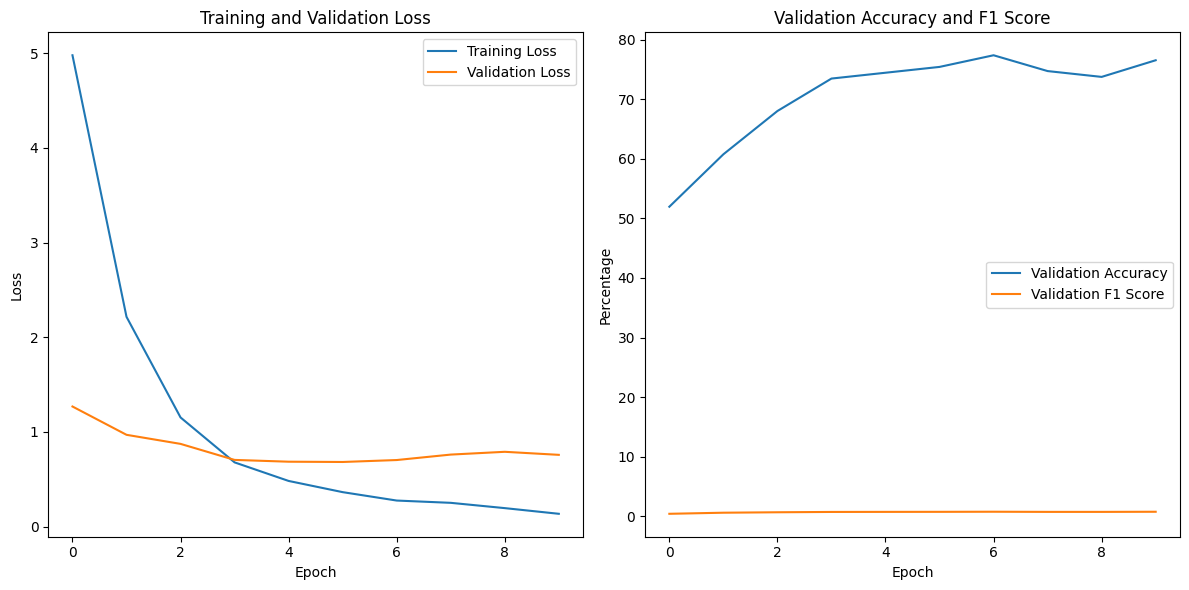


Final Test Accuracy: 0.7430
Final Test F1 Score: 0.7391

Classification Report:
              precision    recall  f1-score   support

       Happy       0.76      0.84      0.80       202
     Neutral       0.61      0.51      0.55       186
       Angry       0.80      0.81      0.80       396
         Sad       0.71      0.72      0.71       111

    accuracy                           0.74       895
   macro avg       0.72      0.72      0.72       895
weighted avg       0.74      0.74      0.74       895

Training Late Fusion - Fold 2
Early stopping triggered at epoch 9


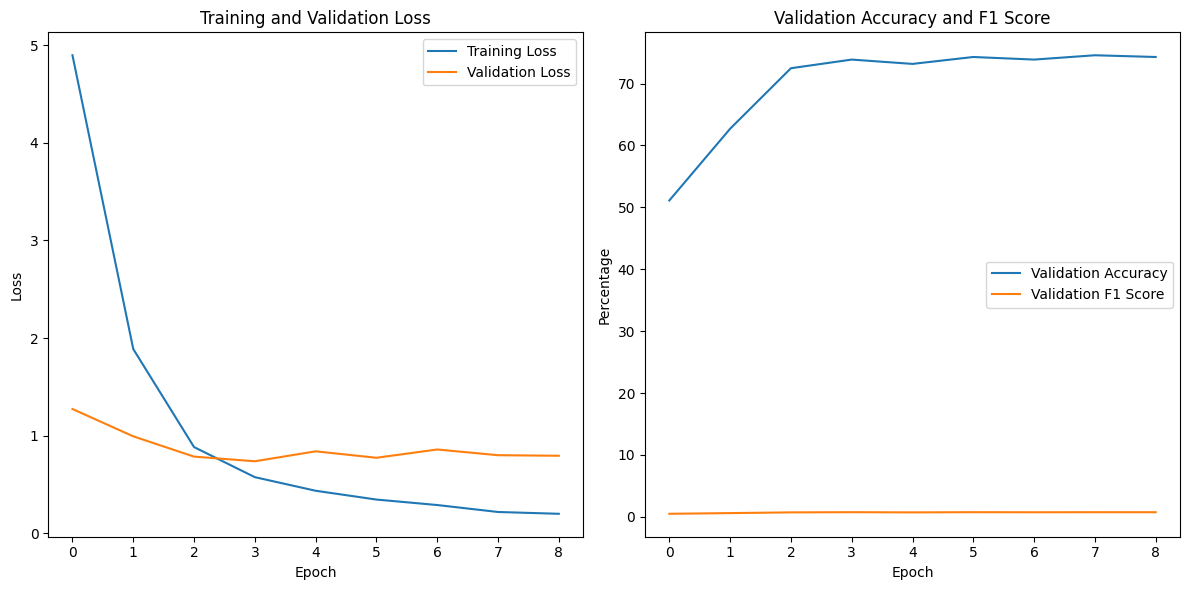


Final Test Accuracy: 0.7394
Final Test F1 Score: 0.7398

Classification Report:
              precision    recall  f1-score   support

       Happy       0.82      0.76      0.79       210
     Neutral       0.56      0.58      0.57       172
       Angry       0.79      0.82      0.80       402
         Sad       0.68      0.67      0.68       110

    accuracy                           0.74       894
   macro avg       0.71      0.71      0.71       894
weighted avg       0.74      0.74      0.74       894

Training Late Fusion - Fold 3
Early stopping triggered at epoch 9


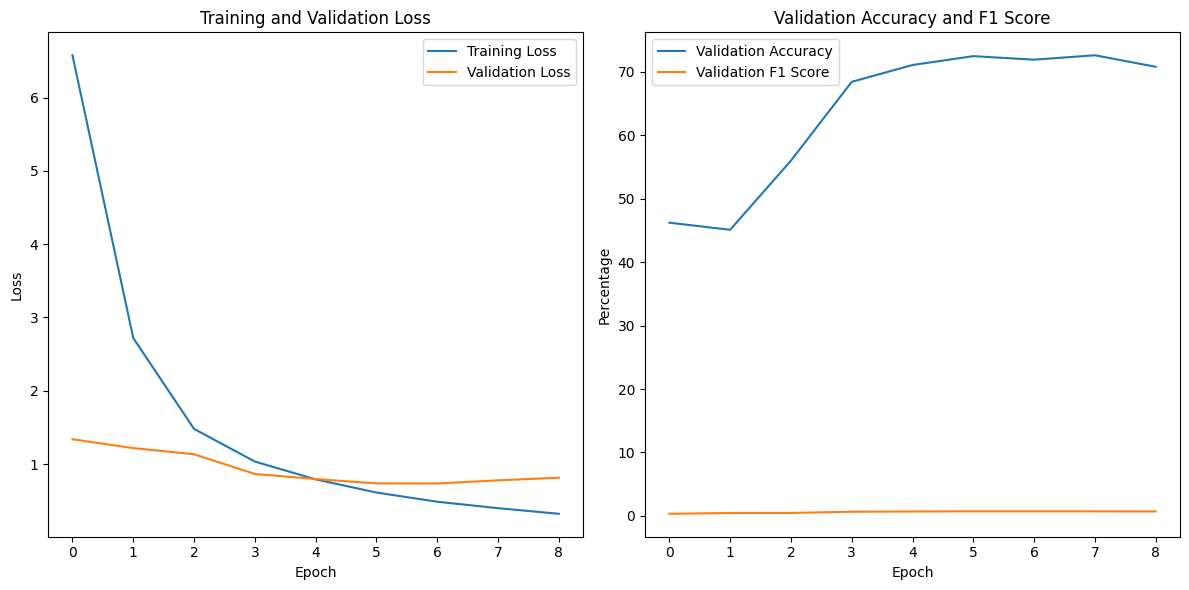


Final Test Accuracy: 0.7248
Final Test F1 Score: 0.7205

Classification Report:
              precision    recall  f1-score   support

       Happy       0.79      0.77      0.78       207
     Neutral       0.56      0.54      0.55       181
       Angry       0.76      0.85      0.80       386
         Sad       0.75      0.53      0.62       120

    accuracy                           0.72       894
   macro avg       0.71      0.67      0.69       894
weighted avg       0.72      0.72      0.72       894

Training Late Fusion - Fold 4
Early stopping triggered at epoch 8


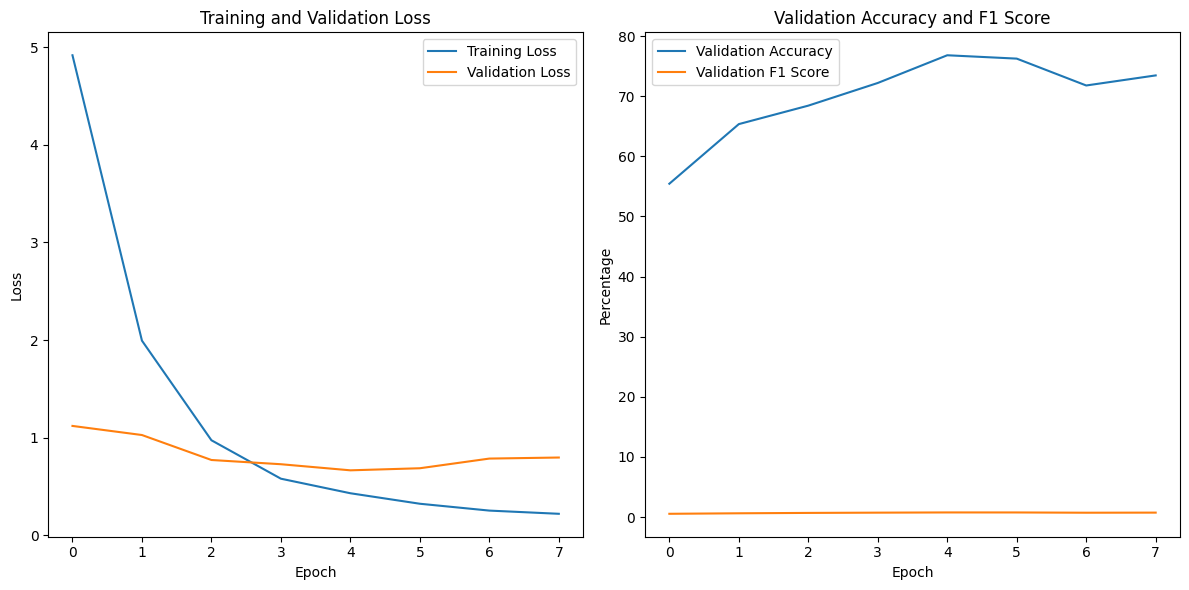


Final Test Accuracy: 0.7047
Final Test F1 Score: 0.7069

Classification Report:
              precision    recall  f1-score   support

       Happy       0.82      0.69      0.75       226
     Neutral       0.51      0.53      0.52       178
       Angry       0.78      0.79      0.78       383
         Sad       0.60      0.73      0.66       107

    accuracy                           0.70       894
   macro avg       0.68      0.68      0.68       894
weighted avg       0.71      0.70      0.71       894

Training Late Fusion - Fold 5
Early stopping triggered at epoch 7


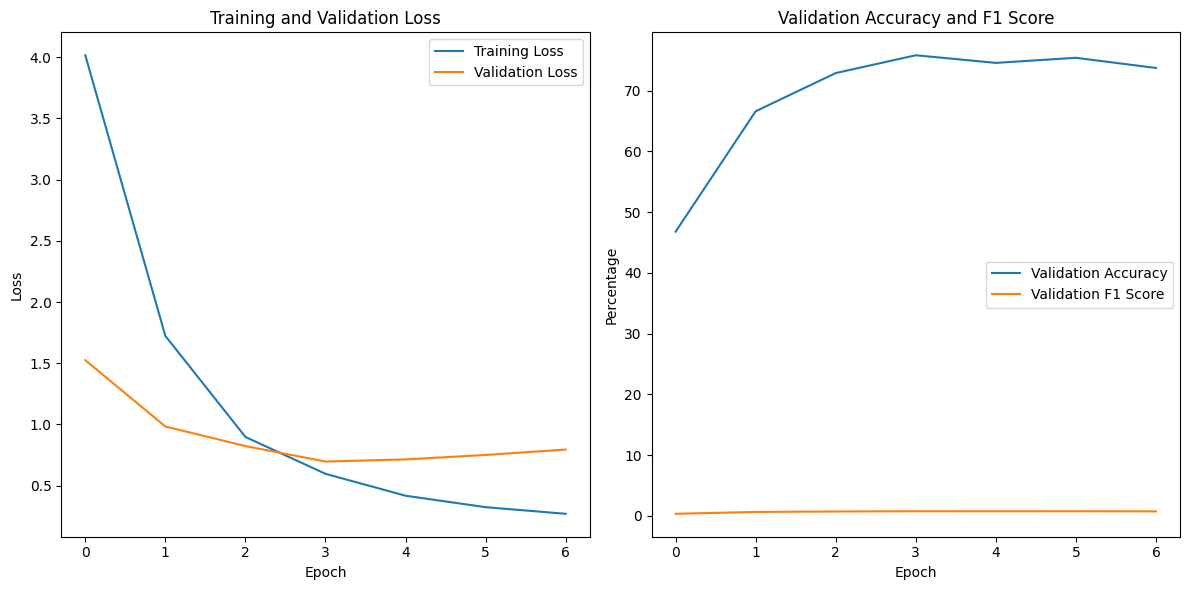


Final Test Accuracy: 0.7427
Final Test F1 Score: 0.7453

Classification Report:
              precision    recall  f1-score   support

       Happy       0.77      0.81      0.79       201
     Neutral       0.53      0.59      0.56       160
       Angry       0.84      0.76      0.80       406
         Sad       0.73      0.76      0.74       127

    accuracy                           0.74       894
   macro avg       0.72      0.73      0.72       894
weighted avg       0.75      0.74      0.75       894


Training and Evaluating Hierarchical Attention Model
Training Hierarchical Attention - Fold 1
Early stopping triggered at epoch 10


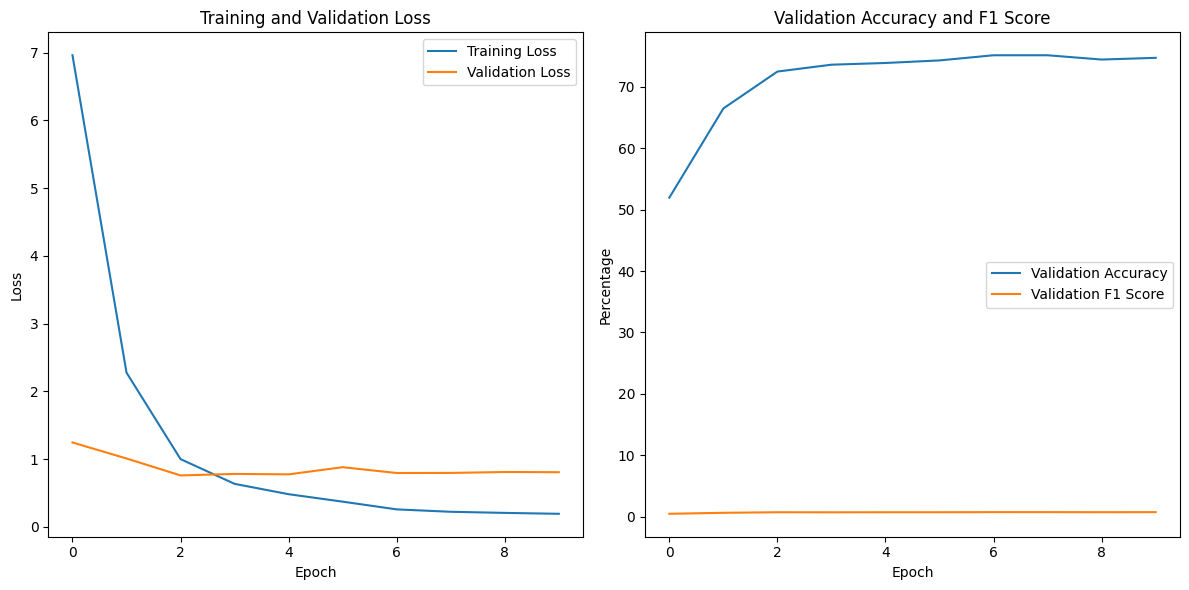


Final Test Accuracy: 0.7330
Final Test F1 Score: 0.7318

Classification Report:
              precision    recall  f1-score   support

       Happy       0.78      0.85      0.81       202
     Neutral       0.59      0.53      0.56       186
       Angry       0.81      0.77      0.79       396
         Sad       0.62      0.74      0.67       111

    accuracy                           0.73       895
   macro avg       0.70      0.72      0.71       895
weighted avg       0.73      0.73      0.73       895

Training Hierarchical Attention - Fold 2
Early stopping triggered at epoch 10


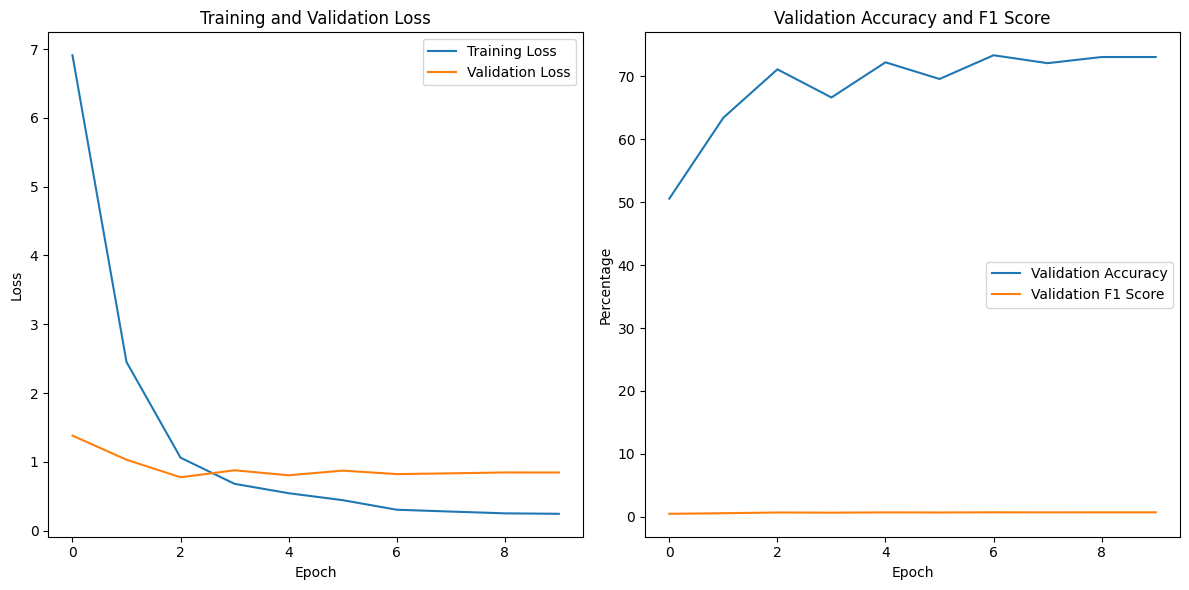


Final Test Accuracy: 0.7450
Final Test F1 Score: 0.7444

Classification Report:
              precision    recall  f1-score   support

       Happy       0.80      0.76      0.78       210
     Neutral       0.61      0.60      0.60       172
       Angry       0.80      0.82      0.81       402
         Sad       0.67      0.65      0.66       110

    accuracy                           0.74       894
   macro avg       0.72      0.71      0.71       894
weighted avg       0.74      0.74      0.74       894

Training Hierarchical Attention - Fold 3
Early stopping triggered at epoch 9


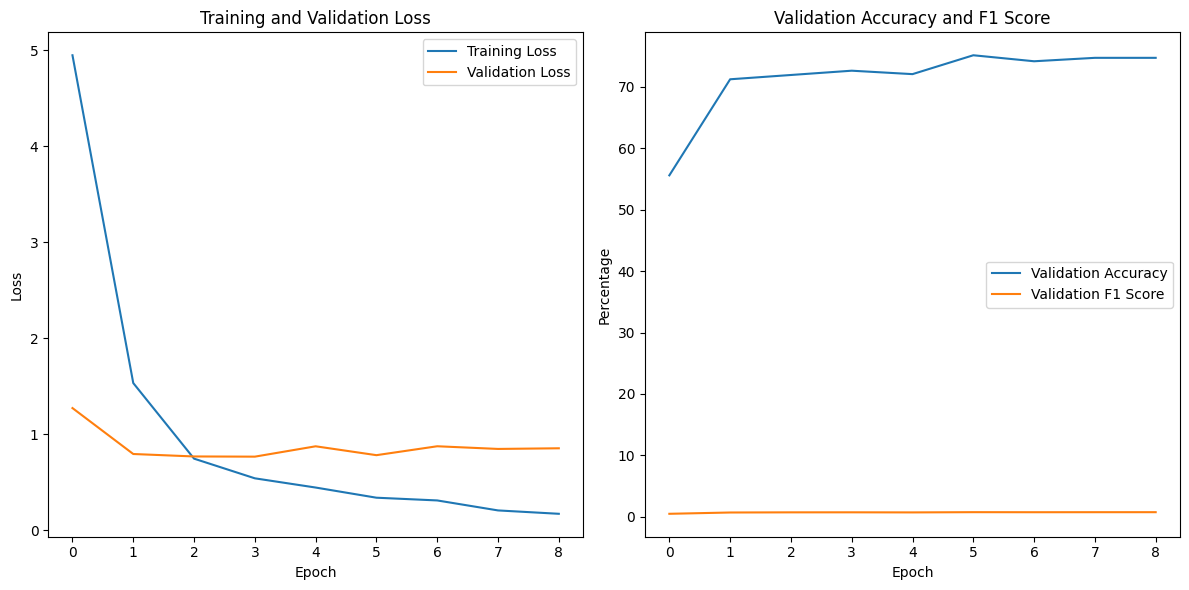


Final Test Accuracy: 0.7606
Final Test F1 Score: 0.7583

Classification Report:
              precision    recall  f1-score   support

       Happy       0.80      0.86      0.83       207
     Neutral       0.62      0.61      0.61       181
       Angry       0.81      0.83      0.82       386
         Sad       0.73      0.60      0.66       120

    accuracy                           0.76       894
   macro avg       0.74      0.72      0.73       894
weighted avg       0.76      0.76      0.76       894

Training Hierarchical Attention - Fold 4
Early stopping triggered at epoch 11


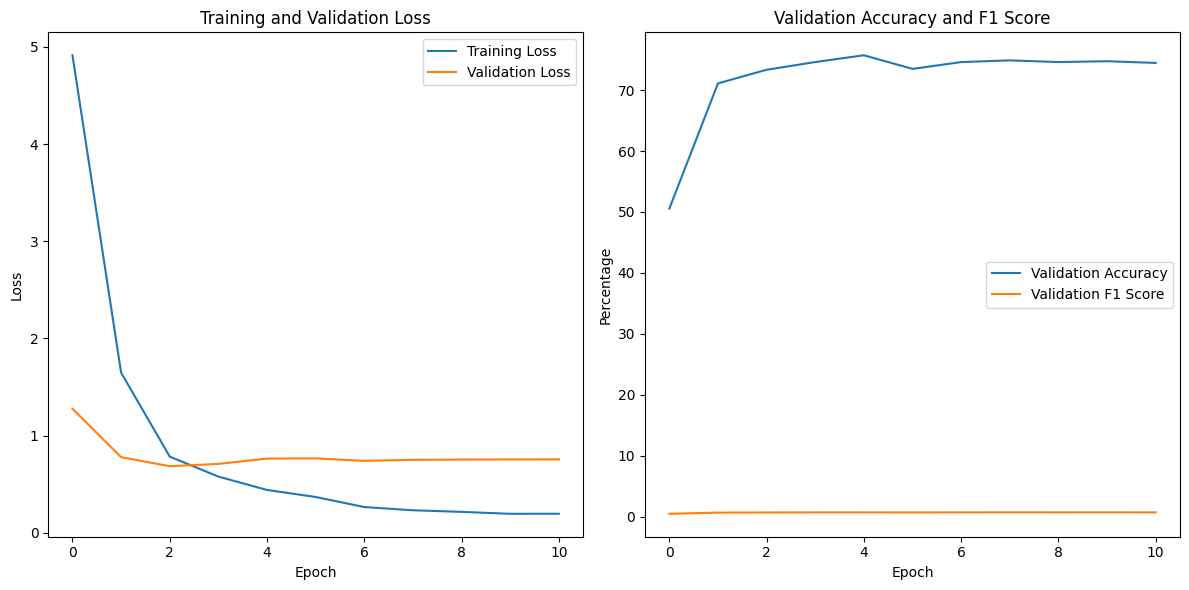


Final Test Accuracy: 0.7360
Final Test F1 Score: 0.7378

Classification Report:
              precision    recall  f1-score   support

       Happy       0.80      0.77      0.79       226
     Neutral       0.57      0.60      0.58       178
       Angry       0.82      0.79      0.80       383
         Sad       0.62      0.68      0.65       107

    accuracy                           0.74       894
   macro avg       0.70      0.71      0.71       894
weighted avg       0.74      0.74      0.74       894

Training Hierarchical Attention - Fold 5
Early stopping triggered at epoch 9


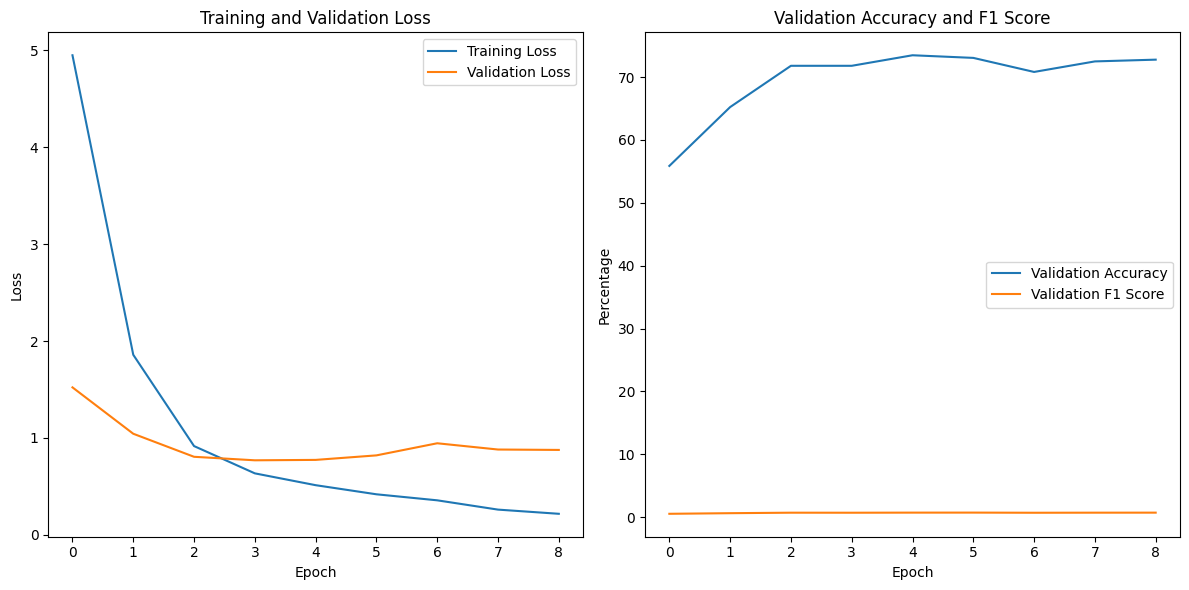


Final Test Accuracy: 0.7427
Final Test F1 Score: 0.7466

Classification Report:
              precision    recall  f1-score   support

       Happy       0.79      0.82      0.80       201
     Neutral       0.52      0.61      0.56       160
       Angry       0.85      0.75      0.80       406
         Sad       0.69      0.76      0.72       127

    accuracy                           0.74       894
   macro avg       0.71      0.73      0.72       894
weighted avg       0.75      0.74      0.75       894


Training and Evaluating Cross-Modal Transformer Model


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Training Cross-Modal Transformer - Fold 1
Early stopping triggered at epoch 11


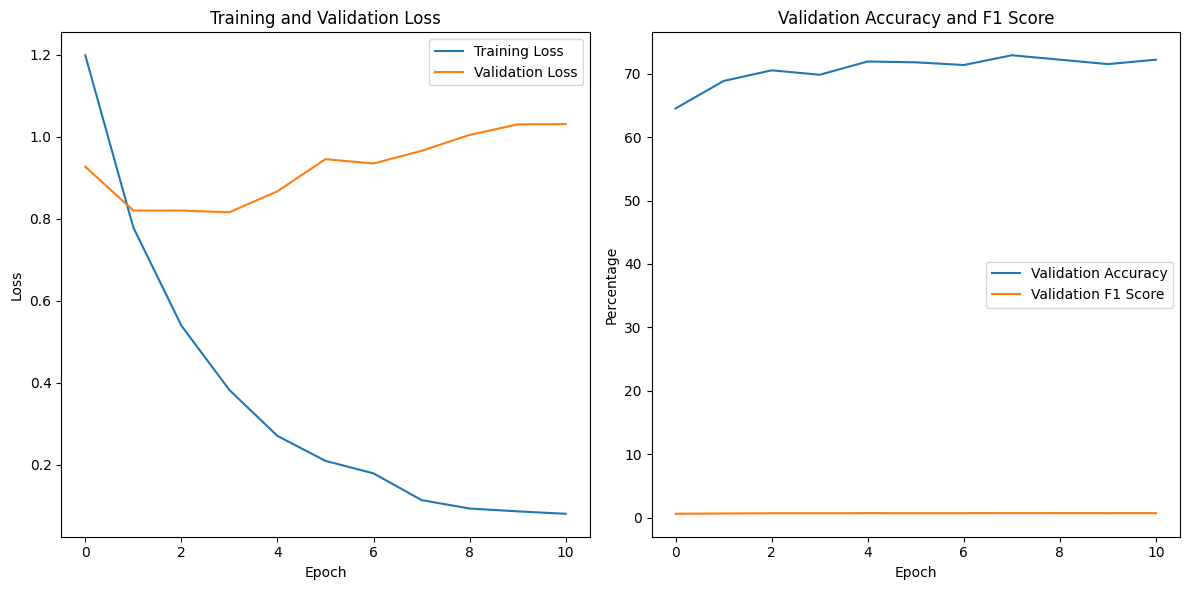


Final Test Accuracy: 0.7419
Final Test F1 Score: 0.7408

Classification Report:
              precision    recall  f1-score   support

       Happy       0.75      0.85      0.80       202
     Neutral       0.60      0.57      0.59       186
       Angry       0.81      0.77      0.79       396
         Sad       0.71      0.74      0.72       111

    accuracy                           0.74       895
   macro avg       0.72      0.73      0.72       895
weighted avg       0.74      0.74      0.74       895



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Training Cross-Modal Transformer - Fold 2
Early stopping triggered at epoch 11


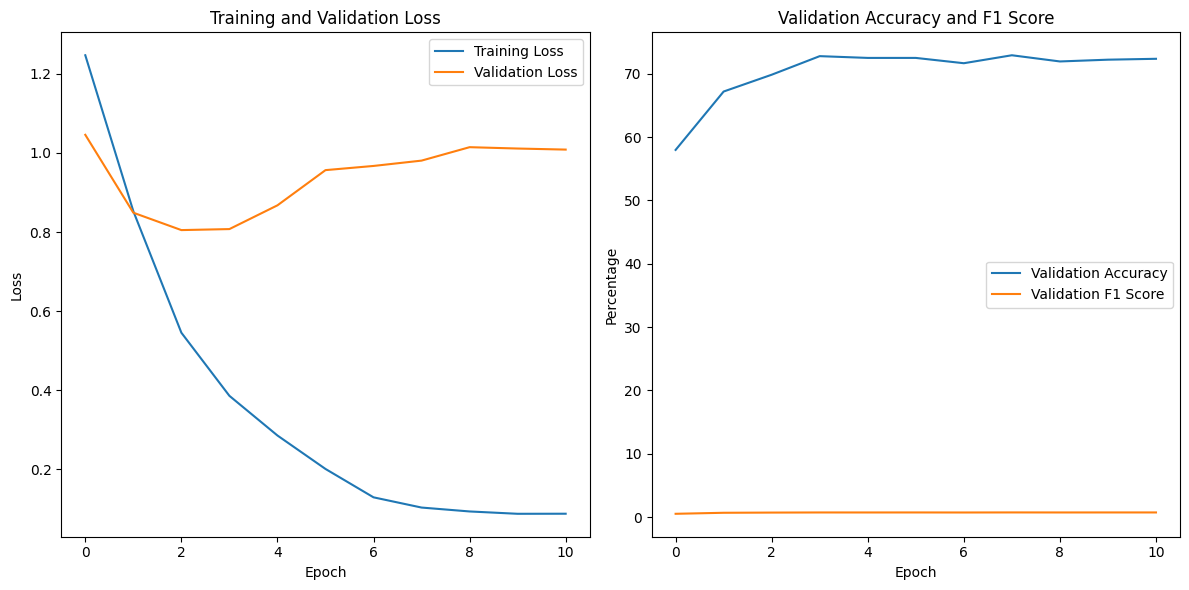


Final Test Accuracy: 0.7271
Final Test F1 Score: 0.7309

Classification Report:
              precision    recall  f1-score   support

       Happy       0.82      0.75      0.78       210
     Neutral       0.53      0.59      0.56       172
       Angry       0.81      0.78      0.80       402
         Sad       0.63      0.71      0.67       110

    accuracy                           0.73       894
   macro avg       0.70      0.71      0.70       894
weighted avg       0.74      0.73      0.73       894



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Training Cross-Modal Transformer - Fold 3
Early stopping triggered at epoch 11


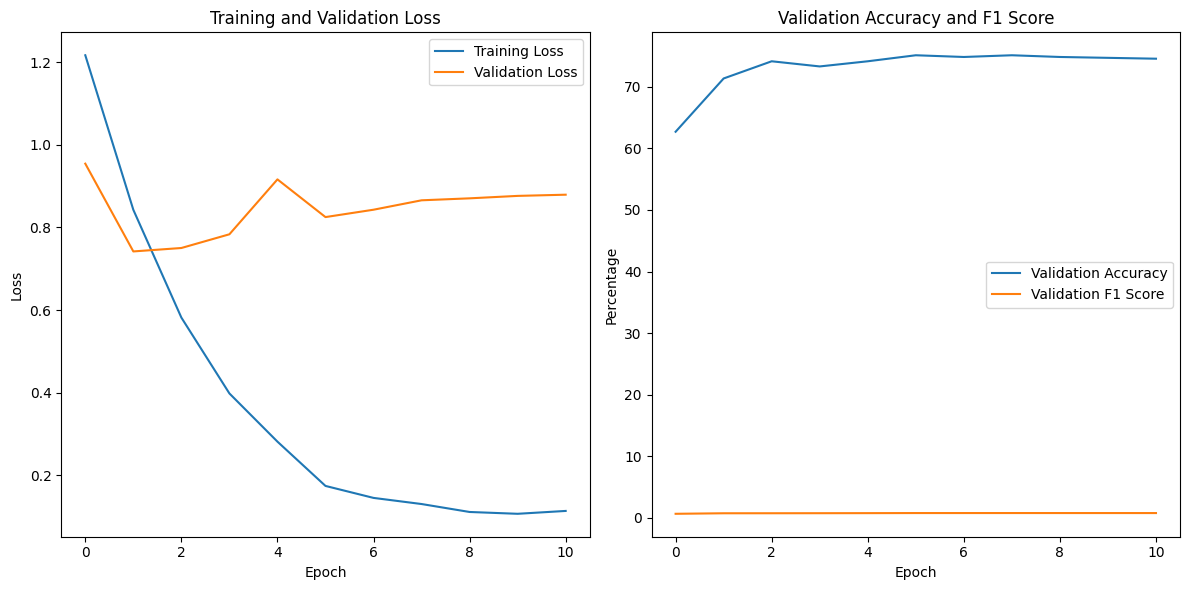


Final Test Accuracy: 0.7383
Final Test F1 Score: 0.7365

Classification Report:
              precision    recall  f1-score   support

       Happy       0.81      0.83      0.82       207
     Neutral       0.58      0.58      0.58       181
       Angry       0.77      0.81      0.79       386
         Sad       0.73      0.60      0.66       120

    accuracy                           0.74       894
   macro avg       0.72      0.70      0.71       894
weighted avg       0.74      0.74      0.74       894



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Training Cross-Modal Transformer - Fold 4
Early stopping triggered at epoch 11


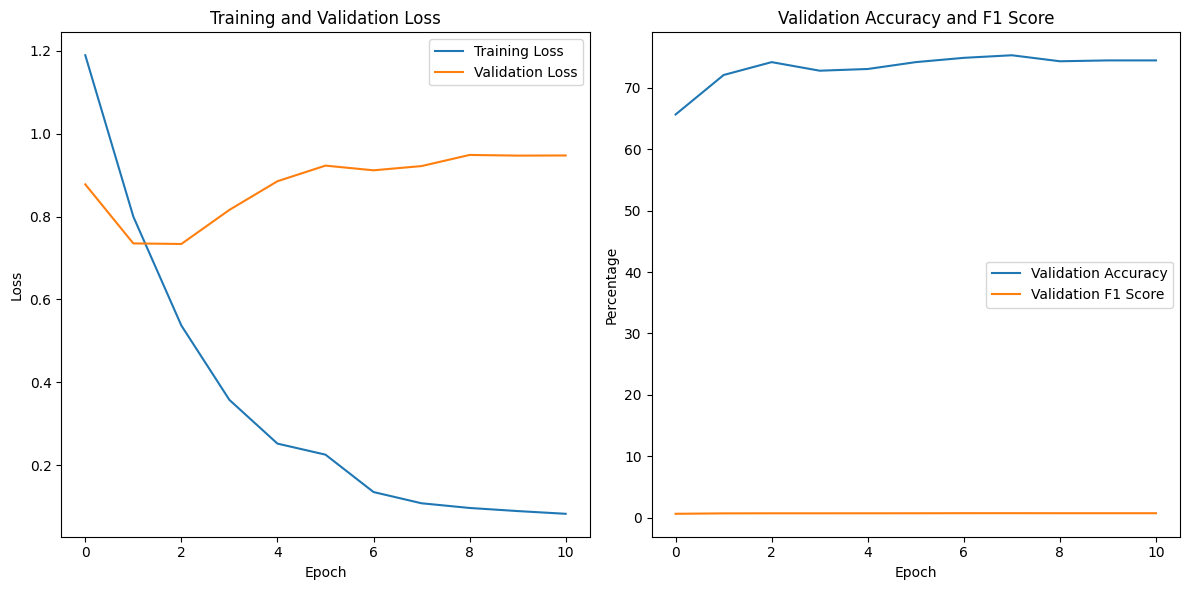


Final Test Accuracy: 0.7282
Final Test F1 Score: 0.7293

Classification Report:
              precision    recall  f1-score   support

       Happy       0.81      0.74      0.78       226
     Neutral       0.56      0.58      0.57       178
       Angry       0.80      0.81      0.80       383
         Sad       0.61      0.64      0.63       107

    accuracy                           0.73       894
   macro avg       0.69      0.69      0.69       894
weighted avg       0.73      0.73      0.73       894



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Training Cross-Modal Transformer - Fold 5
Early stopping triggered at epoch 7


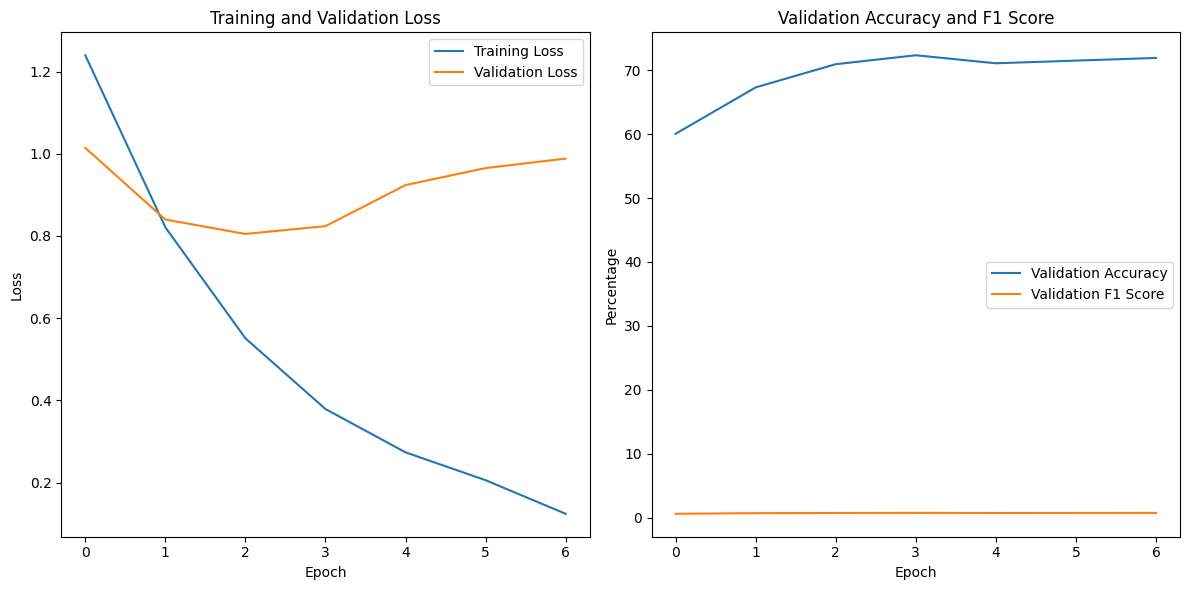


Final Test Accuracy: 0.7226
Final Test F1 Score: 0.7278

Classification Report:
              precision    recall  f1-score   support

       Happy       0.79      0.79      0.79       201
     Neutral       0.51      0.64      0.57       160
       Angry       0.83      0.75      0.79       406
         Sad       0.65      0.65      0.65       127

    accuracy                           0.72       894
   macro avg       0.69      0.71      0.70       894
weighted avg       0.74      0.72      0.73       894


Training and Evaluating Gated Multimodal Model
Training Gated Multimodal - Fold 1
Early stopping triggered at epoch 8


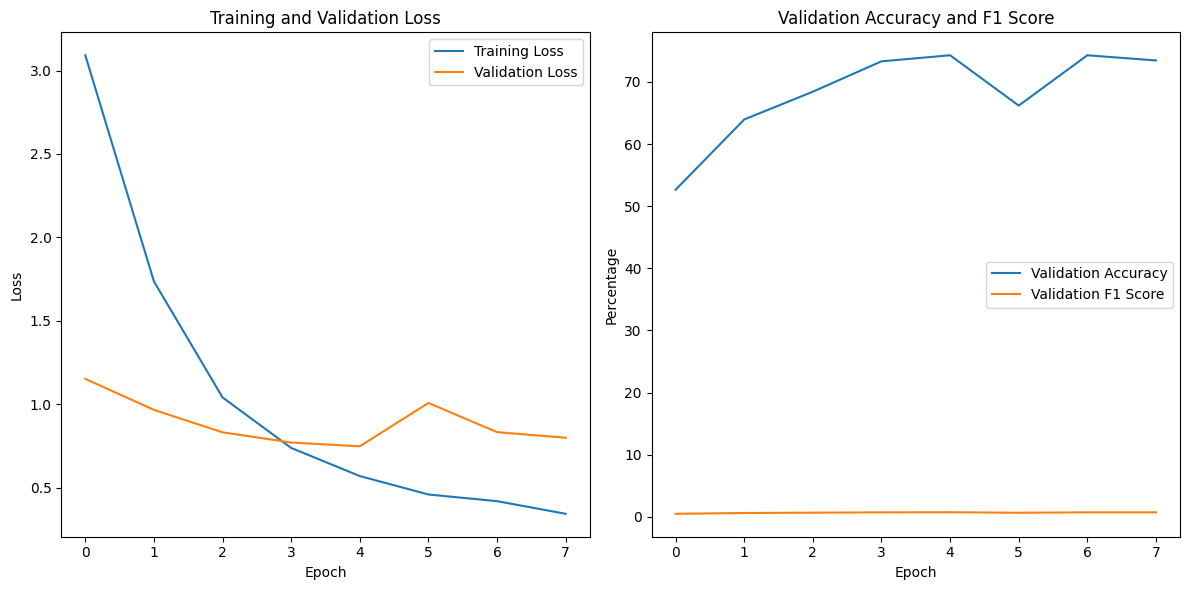


Final Test Accuracy: 0.7229
Final Test F1 Score: 0.7209

Classification Report:
              precision    recall  f1-score   support

       Happy       0.73      0.80      0.76       202
     Neutral       0.55      0.52      0.53       186
       Angry       0.79      0.80      0.79       396
         Sad       0.74      0.68      0.70       111

    accuracy                           0.72       895
   macro avg       0.70      0.70      0.70       895
weighted avg       0.72      0.72      0.72       895

Training Gated Multimodal - Fold 2
Early stopping triggered at epoch 9


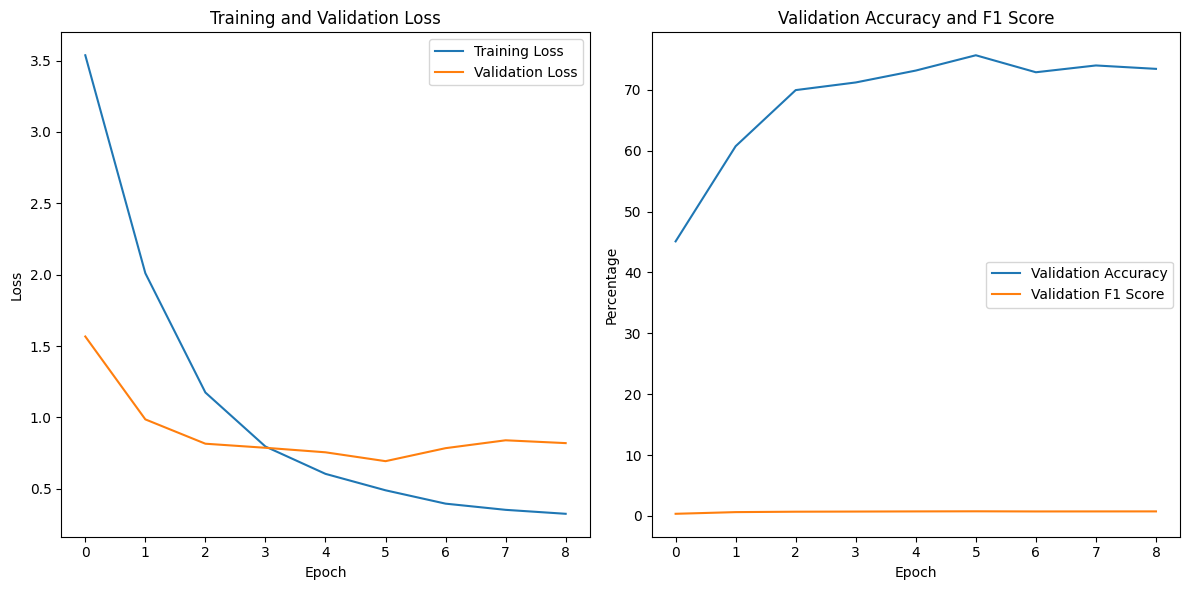


Final Test Accuracy: 0.7181
Final Test F1 Score: 0.7208

Classification Report:
              precision    recall  f1-score   support

       Happy       0.75      0.81      0.78       210
     Neutral       0.56      0.59      0.57       172
       Angry       0.83      0.73      0.78       402
         Sad       0.59      0.68      0.63       110

    accuracy                           0.72       894
   macro avg       0.68      0.71      0.69       894
weighted avg       0.73      0.72      0.72       894

Training Gated Multimodal - Fold 3
Early stopping triggered at epoch 13


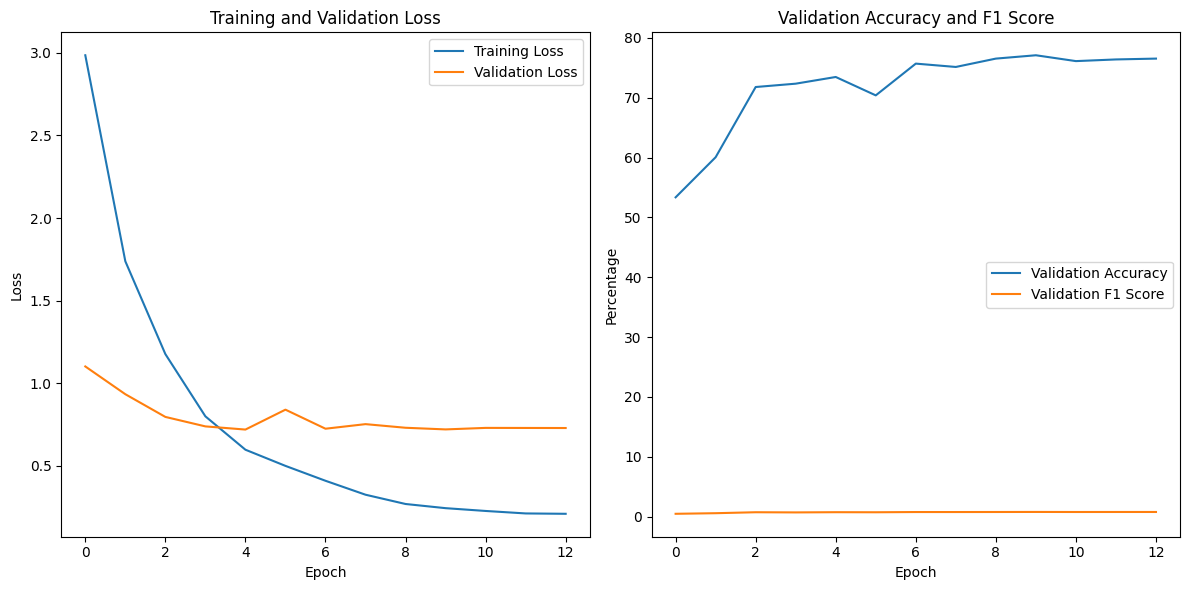


Final Test Accuracy: 0.7506
Final Test F1 Score: 0.7482

Classification Report:
              precision    recall  f1-score   support

       Happy       0.80      0.85      0.82       207
     Neutral       0.64      0.60      0.62       181
       Angry       0.79      0.81      0.80       386
         Sad       0.69      0.62      0.66       120

    accuracy                           0.75       894
   macro avg       0.73      0.72      0.72       894
weighted avg       0.75      0.75      0.75       894

Training Gated Multimodal - Fold 4
Early stopping triggered at epoch 17


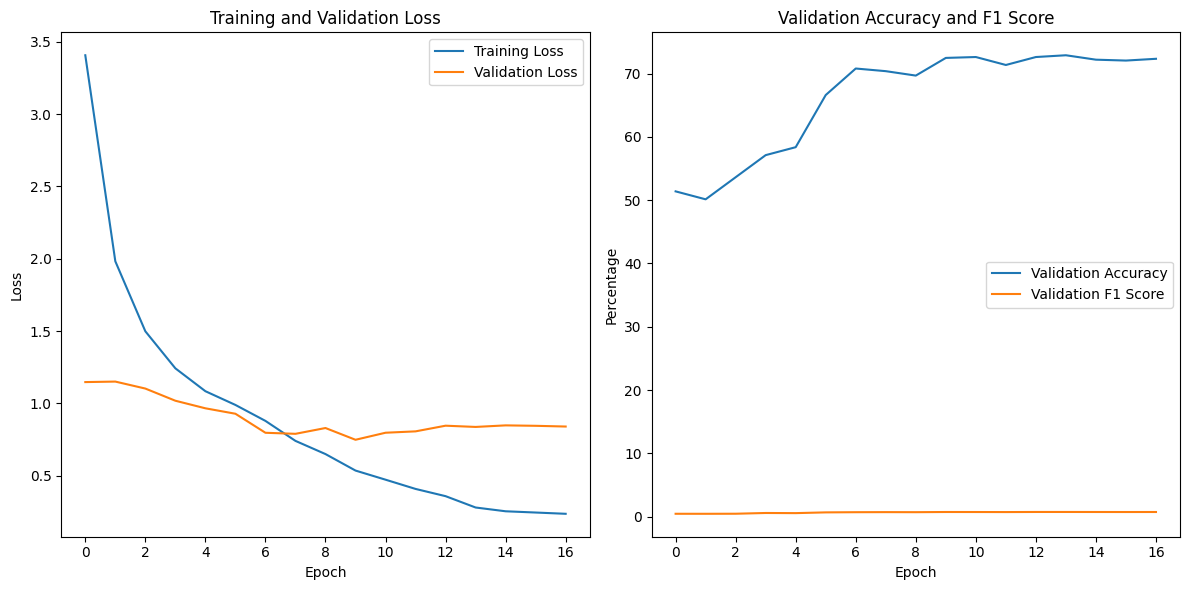


Final Test Accuracy: 0.7047
Final Test F1 Score: 0.7074

Classification Report:
              precision    recall  f1-score   support

       Happy       0.77      0.73      0.75       226
     Neutral       0.49      0.53      0.51       178
       Angry       0.81      0.79      0.80       383
         Sad       0.60      0.63      0.61       107

    accuracy                           0.70       894
   macro avg       0.67      0.67      0.67       894
weighted avg       0.71      0.70      0.71       894

Training Gated Multimodal - Fold 5
Early stopping triggered at epoch 8


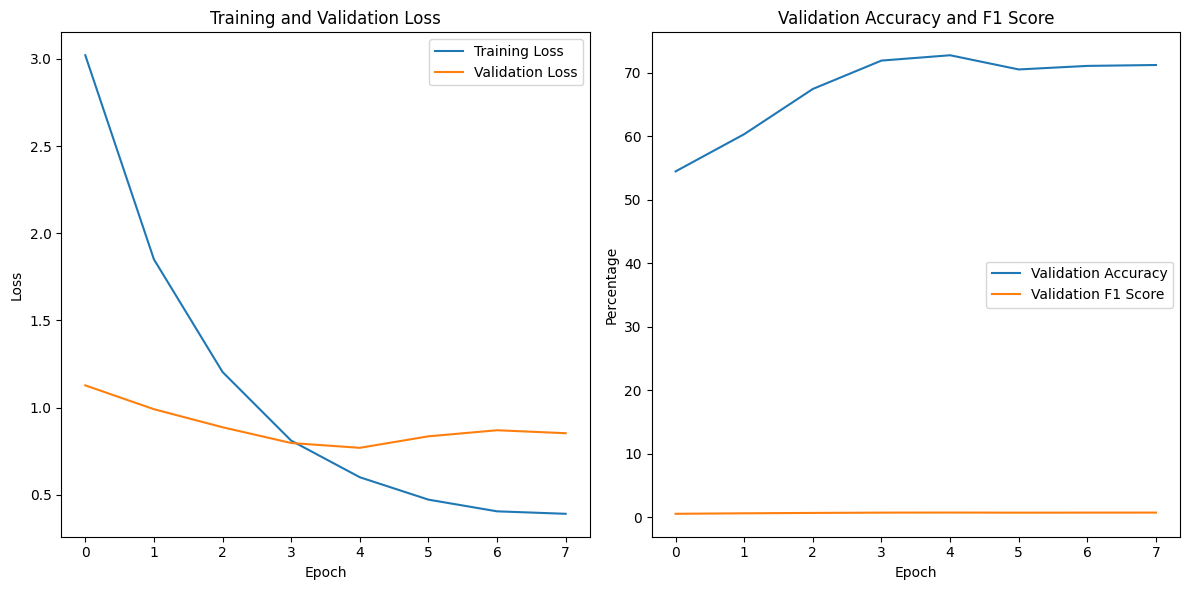


Final Test Accuracy: 0.7271
Final Test F1 Score: 0.7325

Classification Report:
              precision    recall  f1-score   support

       Happy       0.82      0.75      0.78       201
     Neutral       0.52      0.65      0.58       160
       Angry       0.82      0.74      0.78       406
         Sad       0.64      0.75      0.69       127

    accuracy                           0.73       894
   macro avg       0.70      0.72      0.71       894
weighted avg       0.74      0.73      0.73       894


Final Model Comparison Summary:
--------------------------------------------------

Late Fusion Results:
Average F1 Score across folds: 0.7303
Average Accuracy across folds: 0.7309
--------------------------------------------------

Hierarchical Attention Results:
Average F1 Score across folds: 0.7438
Average Accuracy across folds: 0.7435
--------------------------------------------------

Cross-Modal Transformer Results:
Average F1 Score across folds: 0.7330
Average Accuracy ac

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader, Subset
from sklearn.model_selection import KFold
import transformers
transformers.logging.set_verbosity_error()  # Set transformers logging to error only to suppress warnings



# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare the dataset
dataset = MultimodalEmotionDataset(data, audio_features)

# Models to evaluate
#models = {'Late Fusion': LateFusion, 'Hierarchical Attention': HierarchicalAttentionFusion}
models = {
    'Late Fusion': LateFusion,
    'Hierarchical Attention': HierarchicalAttentionFusion,
    'Cross-Modal Transformer': CrossModalTransformerFusion,
    'Gated Multimodal': GatedMultimodalFusion
}

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store model scores
model_scores = {}

# Loop through each model and perform 5-fold cross-validation
for model_name, model_class in models.items():
    print(f"\n{'='*50}")
    print(f"Training and Evaluating {model_name} Model")
    print('='*50)
    f1_scores = []
    accuracies = []
    confusion_matrices = []

    for fold, (train_val_idx, test_idx) in enumerate(kf.split(dataset)):
        # Split train+validation and test sets
        train_val_subset = Subset(dataset, train_val_idx)
        test_subset = Subset(dataset, test_idx)

        # Further split train_val into train and validation
        num_train = int(len(train_val_subset) * 0.8)  # 80% for training, 20% for validation
        train_subset, val_subset = torch.utils.data.random_split(train_val_subset, [num_train, len(train_val_subset) - num_train])

        # Create data loaders
        train_loader = DataLoader(train_subset, batch_size=32, shuffle=True, collate_fn=collate_fn)
        val_loader = DataLoader(val_subset, batch_size=32, shuffle=False, collate_fn=collate_fn)
        test_loader = DataLoader(test_subset, batch_size=32, shuffle=False, collate_fn=collate_fn)

        # Initialize model
        model = model_class().to(device)

        # Train and evaluate model
        print(f"Training {model_name} - Fold {fold+1}")
        test_accuracy, test_f1, test_cm = train_and_evaluate_model(model, train_loader, val_loader, test_loader, model_name, device)

        # Store scores
        f1_scores.append(test_f1)
        accuracies.append(test_accuracy)
        confusion_matrices.append(test_cm)

    # Average results across folds and store in model_scores
    model_scores[model_name] = {
        'Average F1 Score': np.mean(f1_scores),
        'Average Accuracy': np.mean(accuracies),
        'Confusion Matrices': confusion_matrices
    }

# Output results
# Print final comparison summary
print("\nFinal Model Comparison Summary:")
print("-"*50)
for model_name, scores in model_scores.items():
    print(f"\n{model_name} Results:")
    print(f"Average F1 Score across folds: {scores['Average F1 Score']:.4f}")
    print(f"Average Accuracy across folds: {scores['Average Accuracy']:.4f}")
    #for i, cm in enumerate(scores['Confusion Matrices']):
    #    print(f"Confusion Matrix - Fold {i+1}:\n{cm}")
    print("-"*50)
